In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Social networks ads prediction using Naive_bayes

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.shape

(400, 3)

In [6]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

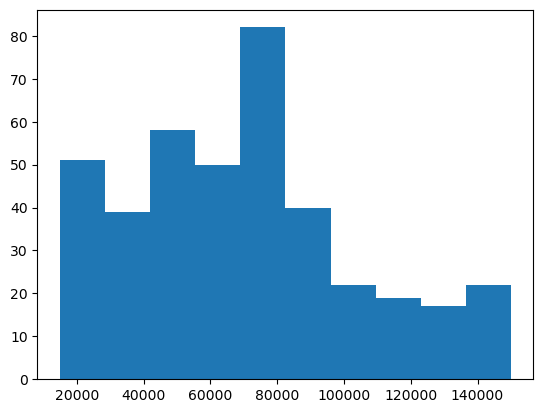

In [9]:
plt.hist(data=df,x='EstimatedSalary')

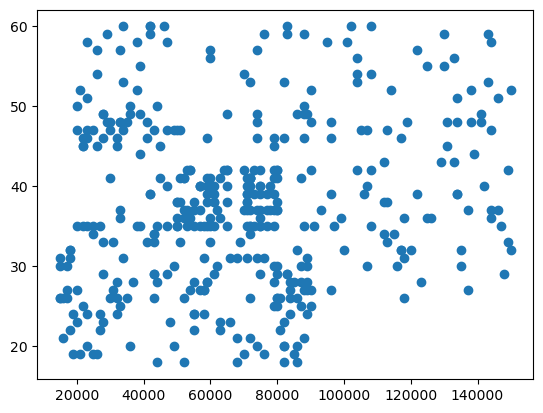

In [10]:
plt.scatter(data=df,x='EstimatedSalary',y='Age')

In [11]:
from sklearn.model_selection import train_test_split
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

## GaussianNB()

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()


In [16]:
classifier.fit(X_train,y_train)

GaussianNB()

In [17]:
#predicting values 

In [18]:
classifier.predict([[15,20000]])

array([0], dtype=int64)

In [19]:
classifier.predict([[44,119000]])

array([1], dtype=int64)

In [20]:
##predicting Training 
y_train_pred=classifier.predict(X_train)

In [21]:
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,

In [22]:
y_train=pd.DataFrame(y_train)
y_train_pred=pd.DataFrame(y_train_pred)

In [23]:
y_train.head(10)

,Purchased
145,0
387,0
44,0
138,0
43,0
368,0
81,0
8,0
61,0
126,0


In [24]:
y_train_pred.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [25]:
##predicting  testing 

In [26]:
y_test_pred=classifier.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [27]:
y_test

146    1
332    0
67     0
362    1
102    0
      ..
55     0
65     0
16     1
153    0
225    0
Name: Purchased, Length: 80, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score

In [29]:
accuracy_score(y_train,y_train_pred)

0.8875

In [30]:
print('training accuracy:\n',(confusion_matrix(y_train,y_train_pred)))

print('classification_report:\n',(classification_report(y_train,y_train_pred)))

training accuracy:
 [[188  15]
 [ 21  96]]
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       203
           1       0.86      0.82      0.84       117

    accuracy                           0.89       320
   macro avg       0.88      0.87      0.88       320
weighted avg       0.89      0.89      0.89       320



In [31]:
accuracy_score(y_test,y_test_pred)

0.8875

In [32]:
print('testing accuracy:\n',(confusion_matrix(y_test,y_test_pred)))
print('classification_report:\n',(classification_report(y_test,y_test_pred)))

testing accuracy:
 [[52  2]
 [ 7 19]]
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        54
           1       0.90      0.73      0.81        26

    accuracy                           0.89        80
   macro avg       0.89      0.85      0.86        80
weighted avg       0.89      0.89      0.88        80

